In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.algorithms import algorithms, search_algorithm
from src.sokoban import SokobanBoard, SokobanAction

## Functions

In [2]:
def open_board(board_path):
    with open(board_path, "r") as f:
        board = SokobanBoard.board_builder(f.read())
    return board

In [3]:
def exec_times(algorithm, board, iters = 20, reverse_actions = False):
    execution_times = np.empty(iters)
    actions = [SokobanAction.UP, SokobanAction.DOWN, SokobanAction.LEFT, SokobanAction.RIGHT]
    if reverse_actions:
        actions = actions[::-1]
    for i in range(0, iters):
        start_time = time.time()
        result = search_algorithm(
            board,
            actions,
            algorithms[algorithm]
        )
        execution_times[i] = time.time() - start_time
    return execution_times*1000

In [4]:
def exec_times_per_algorithm(algorithms, board, iters=20, reverse_actions = False):
    execution_times = {}
    for algorithm in algorithms:
        execution_times[algorithm] = exec_times(algorithm, board, iters, reverse_actions)
    return execution_times

In [5]:
def exec_times_per_algorithm_and_board(algorithms, boards, iters=20, reverse_actions = False):
    execution_times_per_board = []
    for board in boards:
        execution_times_per_board.append(exec_times_per_algorithm(algorithms, board, iters, reverse_actions))
    return execution_times_per_board

In [6]:
def plot_exec_times(boards, boards_names, execution_times_per_algorithm_and_board):
    for (board, board_name, execution_times) in zip(boards, boards_names, execution_times_per_algorithm_and_board):
        print(f"Current board:\n{board}\n")
        df = pd.DataFrame(execution_times)
        for algorithm in df.columns:
            mean_time = df[algorithm].mean()
            print(f"{algorithm}: {mean_time:.2f} ms")
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df)
        plt.xlabel("Algorithm")
        plt.ylabel("Execution Time (ms)")
        plt.title(f"Execution Time Comparison - current board: {board_name}")
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

In [7]:
def plot_search_statistics(boards, boards_names, algorithm_names, reverse_actions = False):
    for board, board_name in zip(boards, boards_names):
        expanded_nodes = []
        remaining_nodes = []
        max_nodes = []
        labels = []
        actions = [SokobanAction.UP, SokobanAction.DOWN, SokobanAction.LEFT, SokobanAction.RIGHT]
        if reverse_actions:
            actions = actions[::-1]
        
        for algo_name in algorithm_names:
            _, exp_nodes, rem_nodes, max_n = search_algorithm(
                board,
                actions,
                algorithms[algo_name]
            )
            labels.append(algo_name.capitalize())
            expanded_nodes.append(exp_nodes)
            remaining_nodes.append(rem_nodes)
            max_nodes.append(max_n)
        
        x = np.arange(len(labels))  # Posiciones para las etiquetas
        width = 0.3  # Ancho de las barras
        
        fig, ax = plt.subplots(figsize=(20, 8))
        rects1 = ax.bar(x - width, expanded_nodes, width, label='Expanded Nodes', color='#4C72B0')
        rects2 = ax.bar(x, remaining_nodes, width, label='Remaining Nodes', color='#DD8452')
        rects3 = ax.bar(x + width, max_nodes, width, label='Max Nodes', color='#55A868')
        
        ax.set_xlabel('Algorithms')
        ax.set_ylabel('Number of Nodes')
        ax.set_title(f'Search Algorithm Performance - current board: {board_name}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        print(f"Current board:\n{board}")
        plt.show()

## Results

In [8]:
board_names = ['board1', 'board2']
boards = []
for bn in board_names:
    boards.append(open_board(f'boards/{bn}.txt'))

### Actions with order UP, DOWN, LEFT, RIGHT with BFS and DFS

In [9]:
execution_times_per_board = exec_times_per_algorithm_and_board(algorithms.keys(), boards)

Current board:
# # # # #
# o _ _ #
# _ b _ #
# _ _ g #
# # # # #


bfs: 1.67 ms
dfs: 1.79 ms
greedy_euc: 0.17 ms
greedy_man: 0.50 ms
greedy_no_corners: 0.62 ms
greedy_no_dead: 0.46 ms
a_star_euc: 0.96 ms
a_star_man: 0.99 ms
a_star_no_corners: 1.01 ms
a_star_no_dead: 1.23 ms


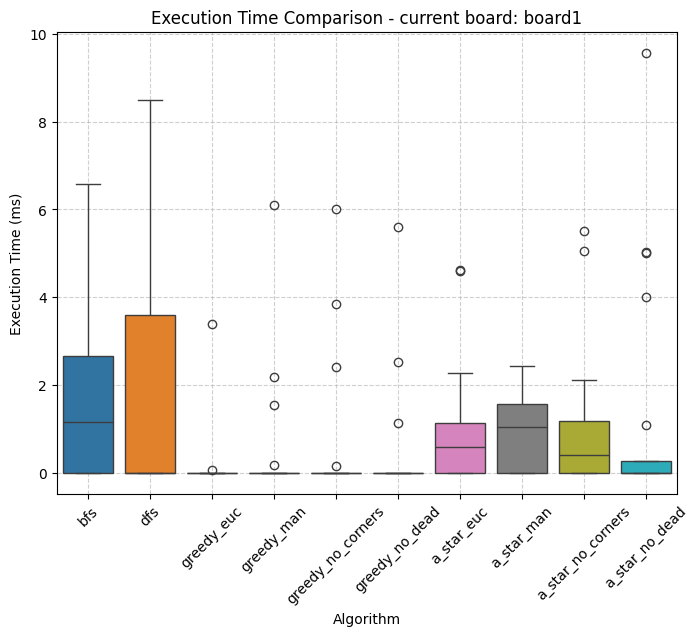

Current board:
# # # # # # # # #
# _ _ _ _ _ _ _ #
# _ b _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ o _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ g #
# # # # # # # # #


bfs: 4123.02 ms
dfs: 145.16 ms
greedy_euc: 1.59 ms
greedy_man: 1.56 ms
greedy_no_corners: 1.56 ms
greedy_no_dead: 4.70 ms
a_star_euc: 116.14 ms
a_star_man: 94.55 ms
a_star_no_corners: 96.58 ms
a_star_no_dead: 92.73 ms


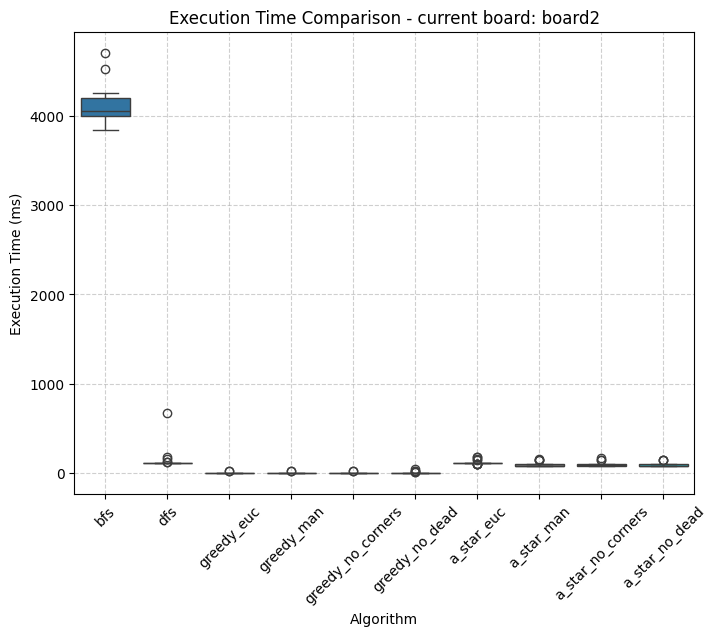

In [10]:
plot_exec_times(boards, board_names, execution_times_per_board)

Current board:
# # # # #
# o _ _ #
# _ b _ #
# _ _ g #
# # # # #



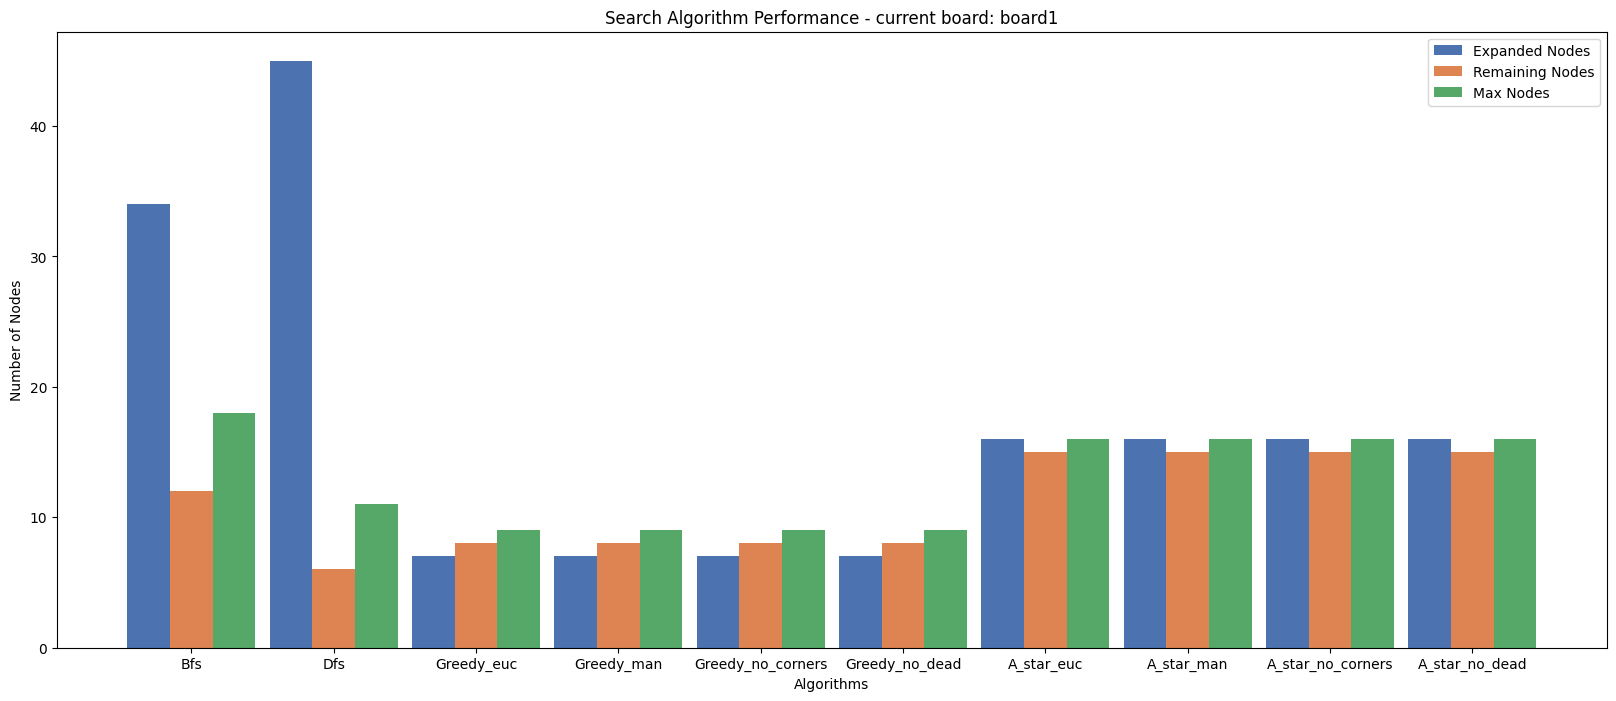

Current board:
# # # # # # # # #
# _ _ _ _ _ _ _ #
# _ b _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ o _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ g #
# # # # # # # # #



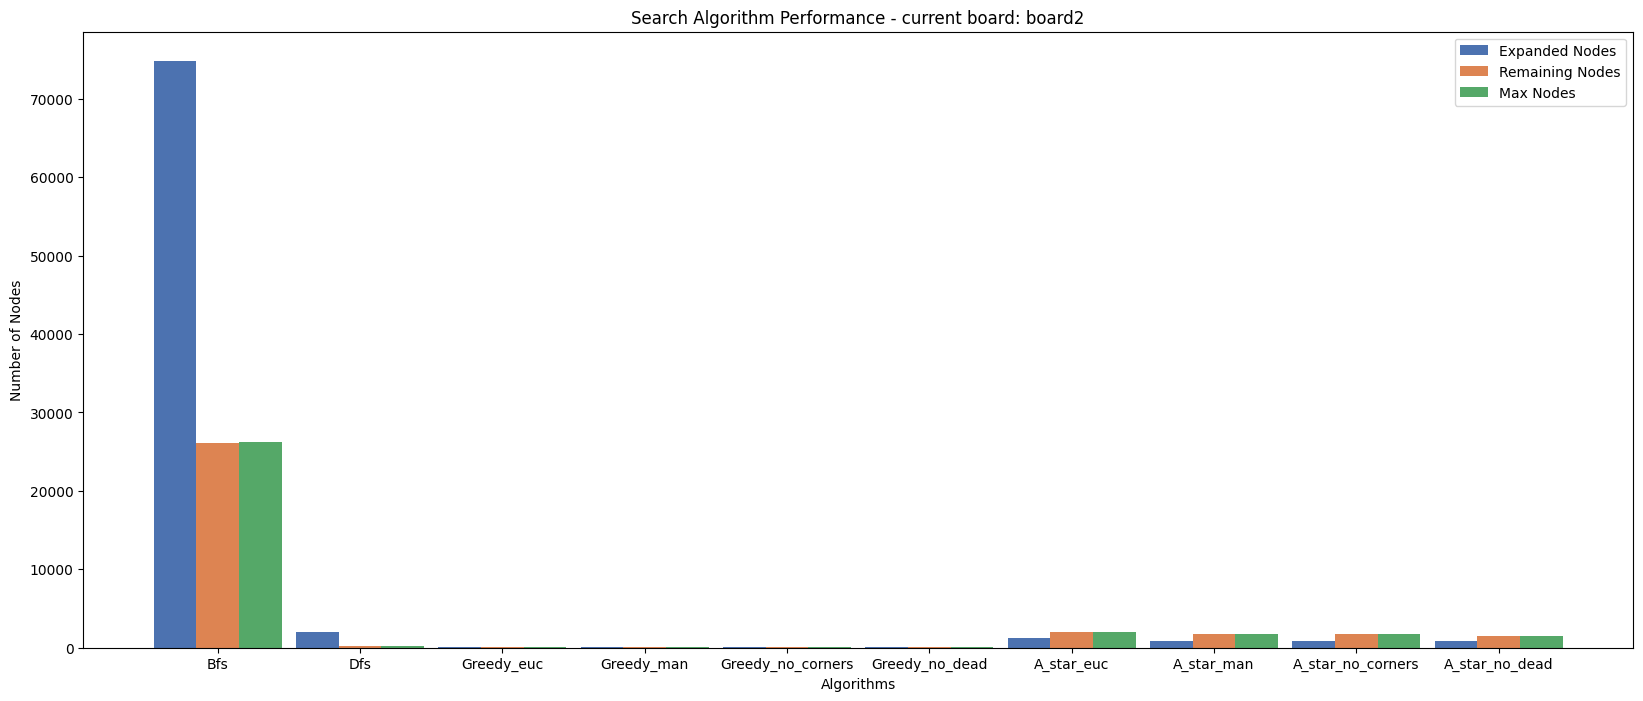

In [11]:
plot_search_statistics(boards, board_names, algorithms.keys())

### Actions with order RIGHT, LEFT, DOWN, UP with BFS and DFS

In [12]:
execution_times_per_board = exec_times_per_algorithm_and_board(algorithms.keys(), boards, reverse_actions = True)

Current board:
# # # # #
# o _ _ #
# _ b _ #
# _ _ g #
# # # # #


bfs: 1.35 ms
dfs: 2.00 ms
greedy_euc: 0.82 ms
greedy_man: 0.68 ms
greedy_no_corners: 0.13 ms
greedy_no_dead: 0.78 ms
a_star_euc: 0.78 ms
a_star_man: 0.88 ms
a_star_no_corners: 1.48 ms
a_star_no_dead: 0.78 ms


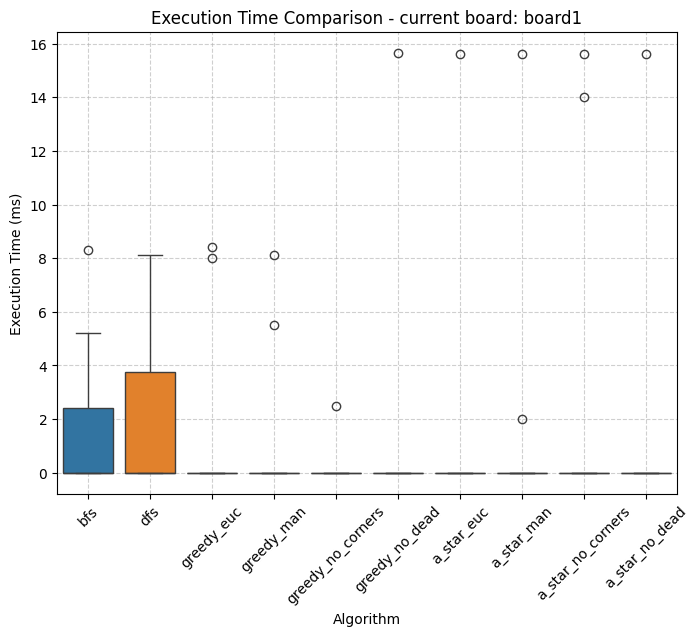

Current board:
# # # # # # # # #
# _ _ _ _ _ _ _ #
# _ b _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ o _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ g #
# # # # # # # # #


bfs: 4043.04 ms
dfs: 26.66 ms
greedy_euc: 2.35 ms
greedy_man: 1.56 ms
greedy_no_corners: 2.51 ms
greedy_no_dead: 2.21 ms
a_star_euc: 140.78 ms
a_star_man: 95.62 ms
a_star_no_corners: 99.60 ms
a_star_no_dead: 90.35 ms


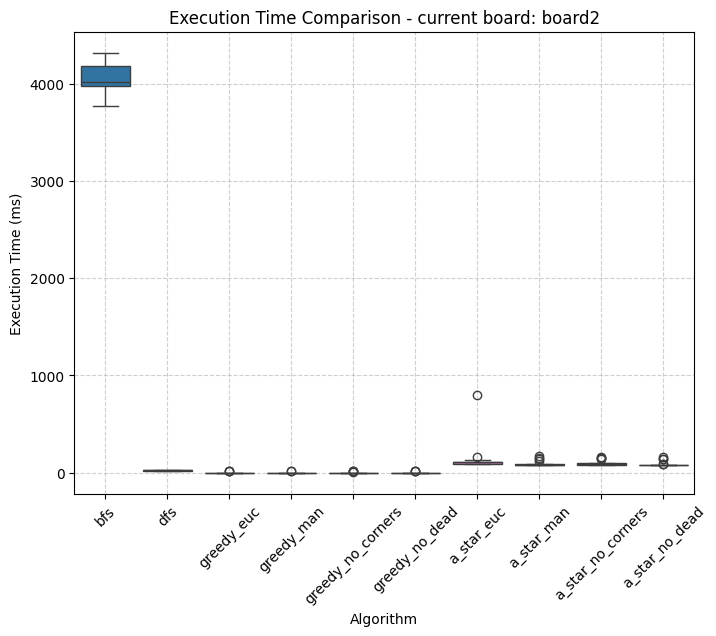

In [13]:
plot_exec_times(boards, board_names, execution_times_per_board)

Current board:
# # # # #
# o _ _ #
# _ b _ #
# _ _ g #
# # # # #



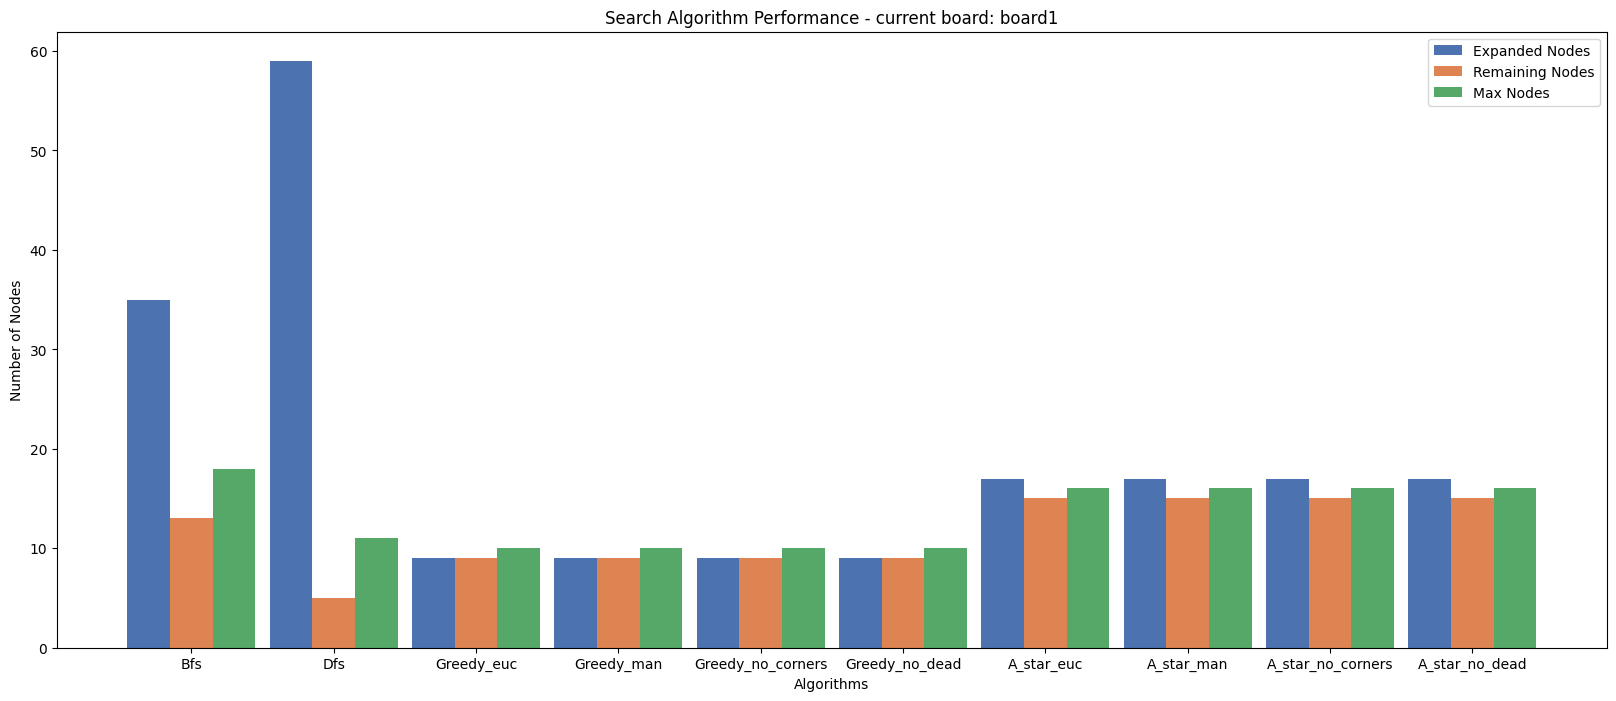

Current board:
# # # # # # # # #
# _ _ _ _ _ _ _ #
# _ b _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ o _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ g #
# # # # # # # # #



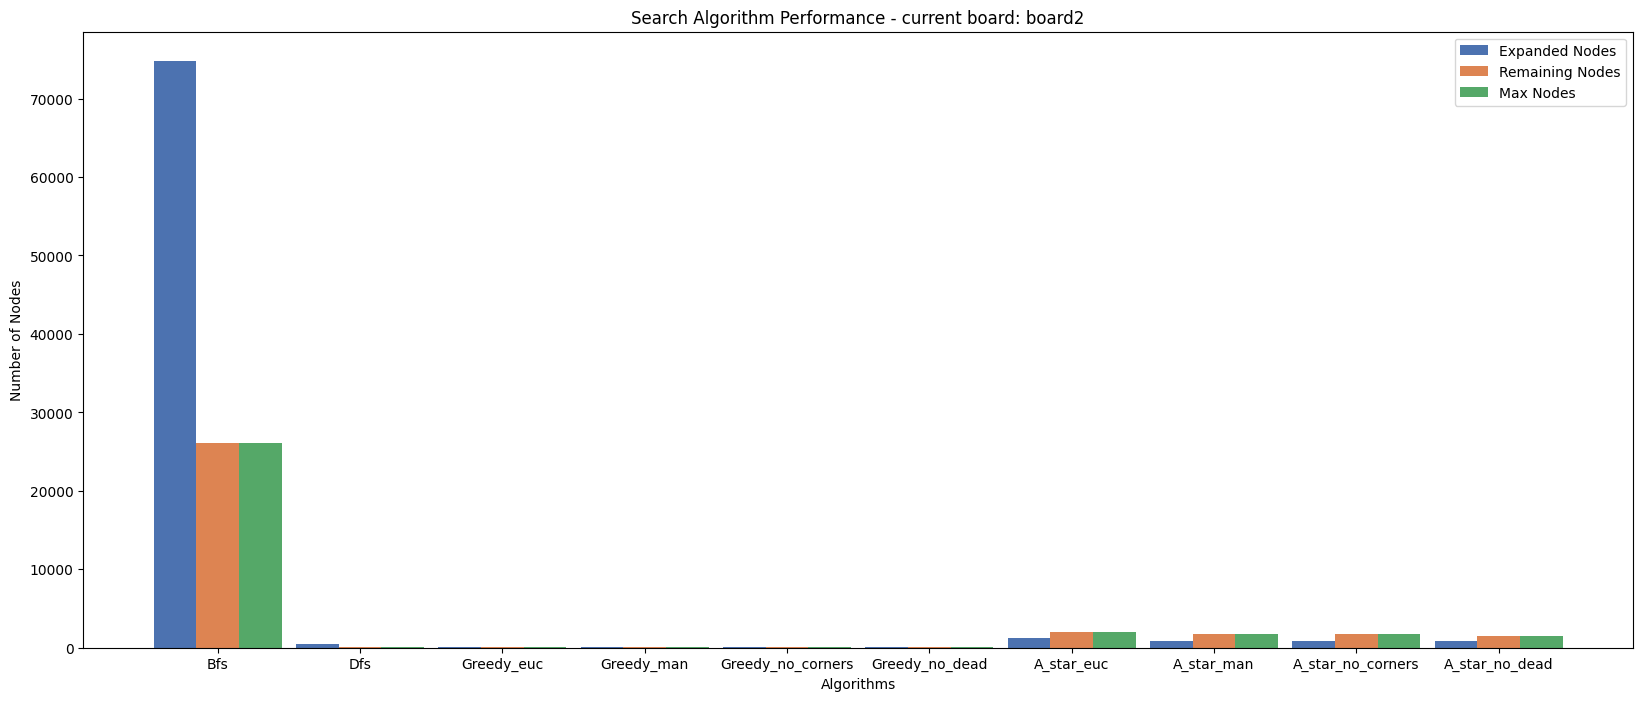

In [14]:
plot_search_statistics(boards, board_names, algorithms.keys(), reverse_actions = True)

### Actions with order UP, DOWN, LEFT, RIGHT without BFS and DFS, and with more boards

In [15]:
board_names = ['board1', 'board2', 'board3', 'board8']
boards = []
for bn in board_names:
    boards.append(open_board(f'boards/{bn}.txt'))

In [16]:
algos = [algo for algo in algorithms.keys() if algo != 'bfs' and algo != 'dfs']
execution_times_per_board = exec_times_per_algorithm_and_board(algos, boards, iters=10)

Current board:
# # # # #
# o _ _ #
# _ b _ #
# _ _ g #
# # # # #


greedy_euc: 0.83 ms
greedy_man: 0.00 ms
greedy_no_corners: 0.81 ms
greedy_no_dead: 0.81 ms
a_star_euc: 0.81 ms
a_star_man: 0.79 ms
a_star_no_corners: 1.60 ms
a_star_no_dead: 0.82 ms


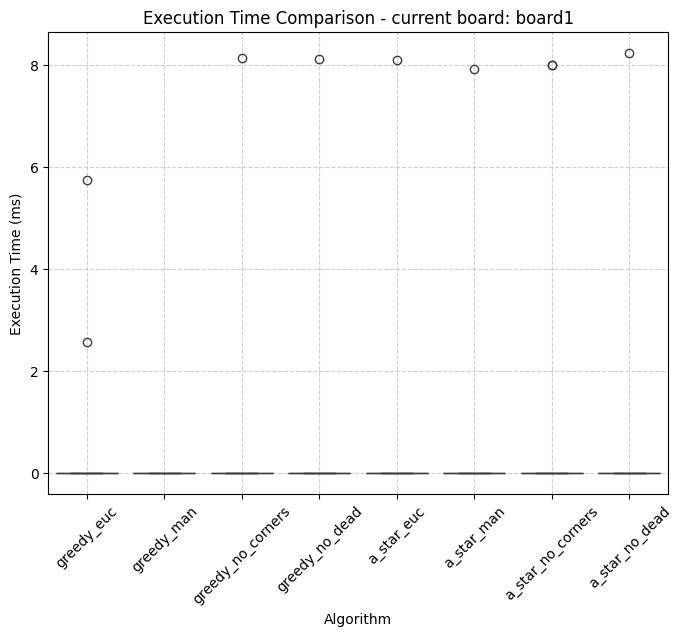

Current board:
# # # # # # # # #
# _ _ _ _ _ _ _ #
# _ b _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ o _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ g #
# # # # # # # # #


greedy_euc: 1.66 ms
greedy_man: 1.60 ms
greedy_no_corners: 1.57 ms
greedy_no_dead: 1.56 ms
a_star_euc: 149.74 ms
a_star_man: 93.94 ms
a_star_no_corners: 94.11 ms
a_star_no_dead: 93.98 ms


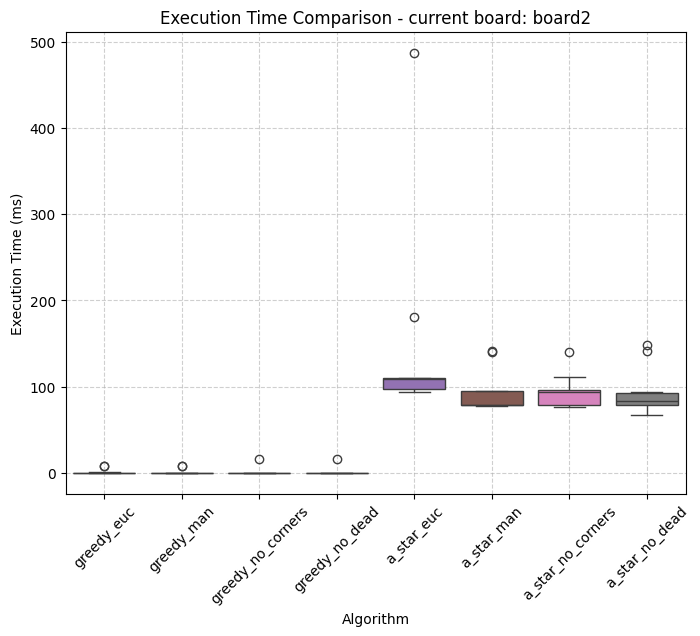

Current board:
_ _ _ _ _ _ # # #
_ _ _ _ _ _ # g #
_ _ # # # # # g # # # # #
_ # # _ _ _ _ _ _ _ _ _ # #
# # _ _ # _ # _ # _ # _ _ # #
# _ _ # # _ _ _ _ _ # # _ _ #
# _ # # _ _ # _ # _ _ # # _ #
# _ _ _ _ _ b o b _ _ _ _ _ #
# # # # _ _ # # # _ _ # # # #
_ _ _ # # # # _ # # # #


greedy_euc: 368.95 ms
greedy_man: 488.83 ms
greedy_no_corners: 321.50 ms
greedy_no_dead: 378.84 ms
a_star_euc: 5817.11 ms
a_star_man: 4607.33 ms
a_star_no_corners: 2417.81 ms
a_star_no_dead: 2712.84 ms


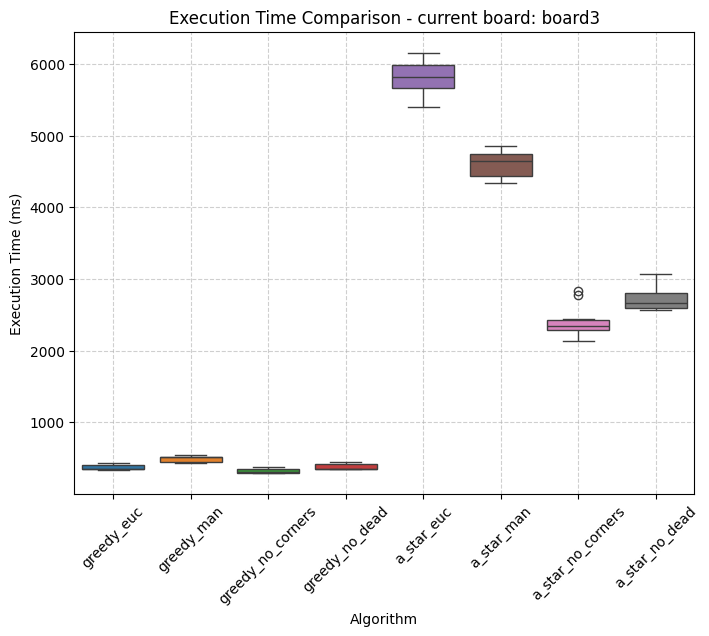

Current board:
# # # # # # # # # # # # # # # # # # #
# # # # # # # # # # g _ _ # # # # # #
# # # # # # # _ o _ # _ _ _ # # # # #
# # # # # # _ _ b _ # _ _ _ _ # # # #
# # # # # _ _ _ _ # # # _ _ _ _ # # #
# # # # _ _ _ _ # # # # # _ _ _ _ # #
# # # _ _ _ _ # # # # # # # _ _ _ _ #
# # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# # # # # # # # # # # # # # _ _ # # #
# # # # # # # # # # # # # # # # # # #


greedy_euc: 167.19 ms
greedy_man: 123.95 ms
greedy_no_corners: 59.64 ms
greedy_no_dead: 49.48 ms
a_star_euc: 1152.59 ms
a_star_man: 839.02 ms
a_star_no_corners: 434.65 ms
a_star_no_dead: 403.20 ms


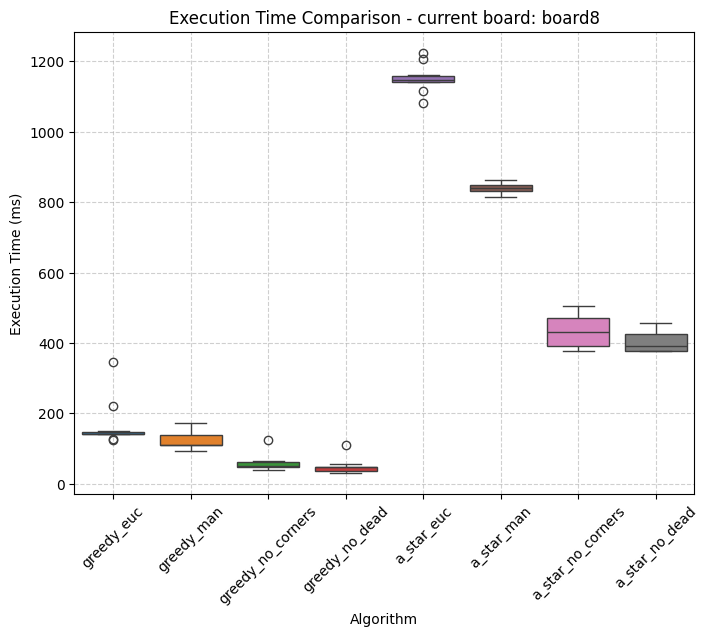

In [17]:
plot_exec_times(boards, board_names, execution_times_per_board)

Current board:
# # # # #
# o _ _ #
# _ b _ #
# _ _ g #
# # # # #



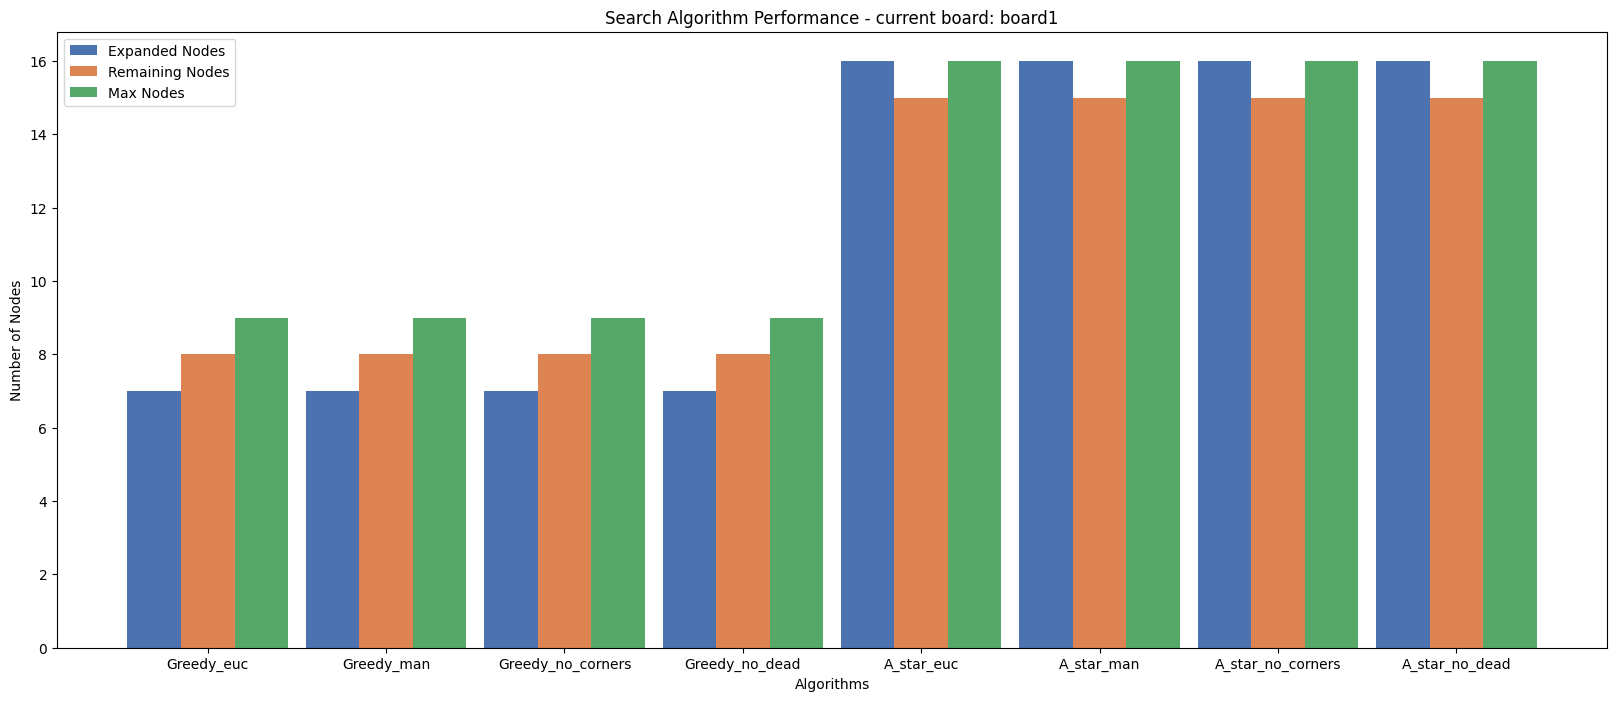

Current board:
# # # # # # # # #
# _ _ _ _ _ _ _ #
# _ b _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ o _ _ _ #
# _ _ _ _ _ _ _ #
# _ _ _ _ _ _ g #
# # # # # # # # #



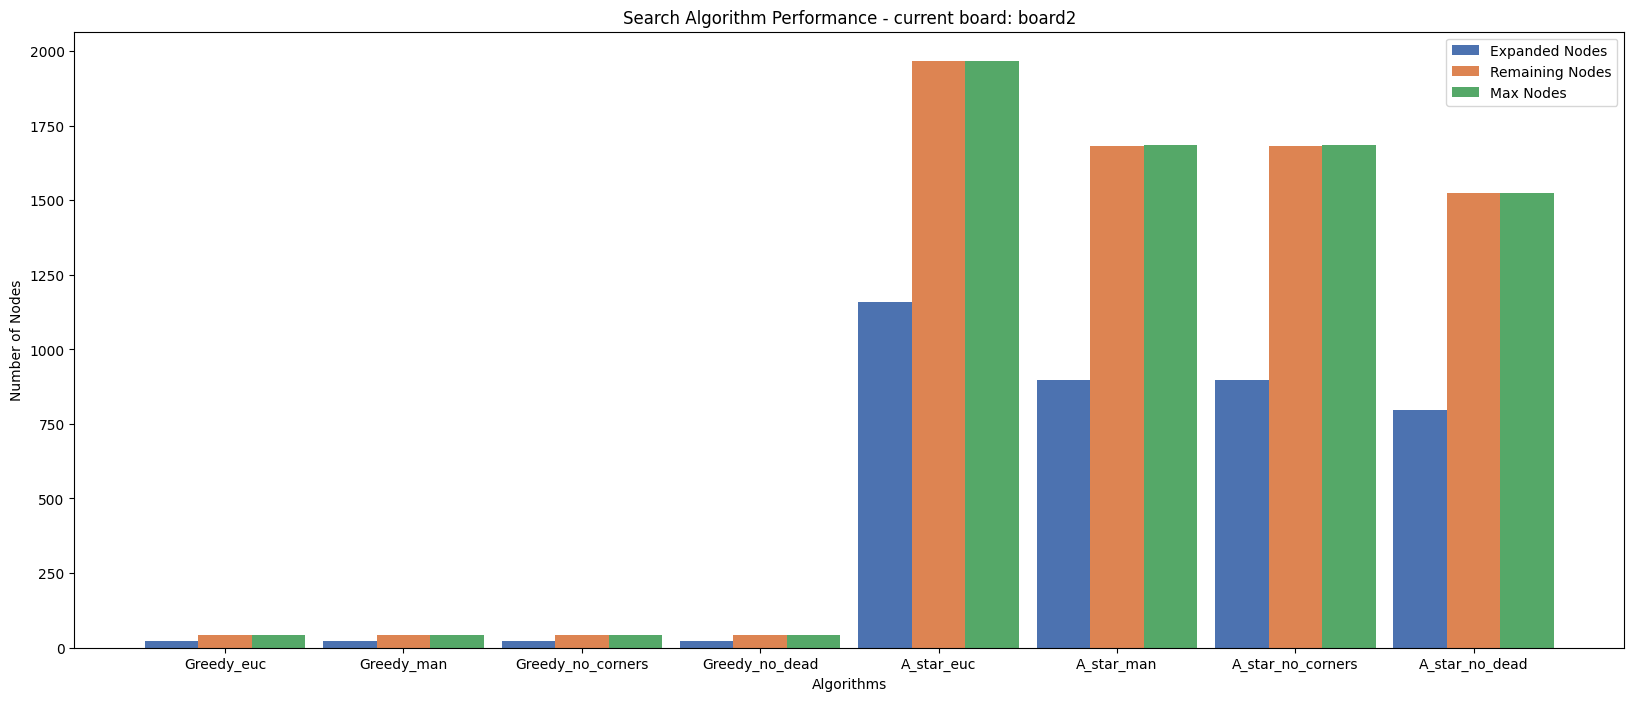

Current board:
_ _ _ _ _ _ # # #
_ _ _ _ _ _ # g #
_ _ # # # # # g # # # # #
_ # # _ _ _ _ _ _ _ _ _ # #
# # _ _ # _ # _ # _ # _ _ # #
# _ _ # # _ _ _ _ _ # # _ _ #
# _ # # _ _ # _ # _ _ # # _ #
# _ _ _ _ _ b o b _ _ _ _ _ #
# # # # _ _ # # # _ _ # # # #
_ _ _ # # # # _ # # # #



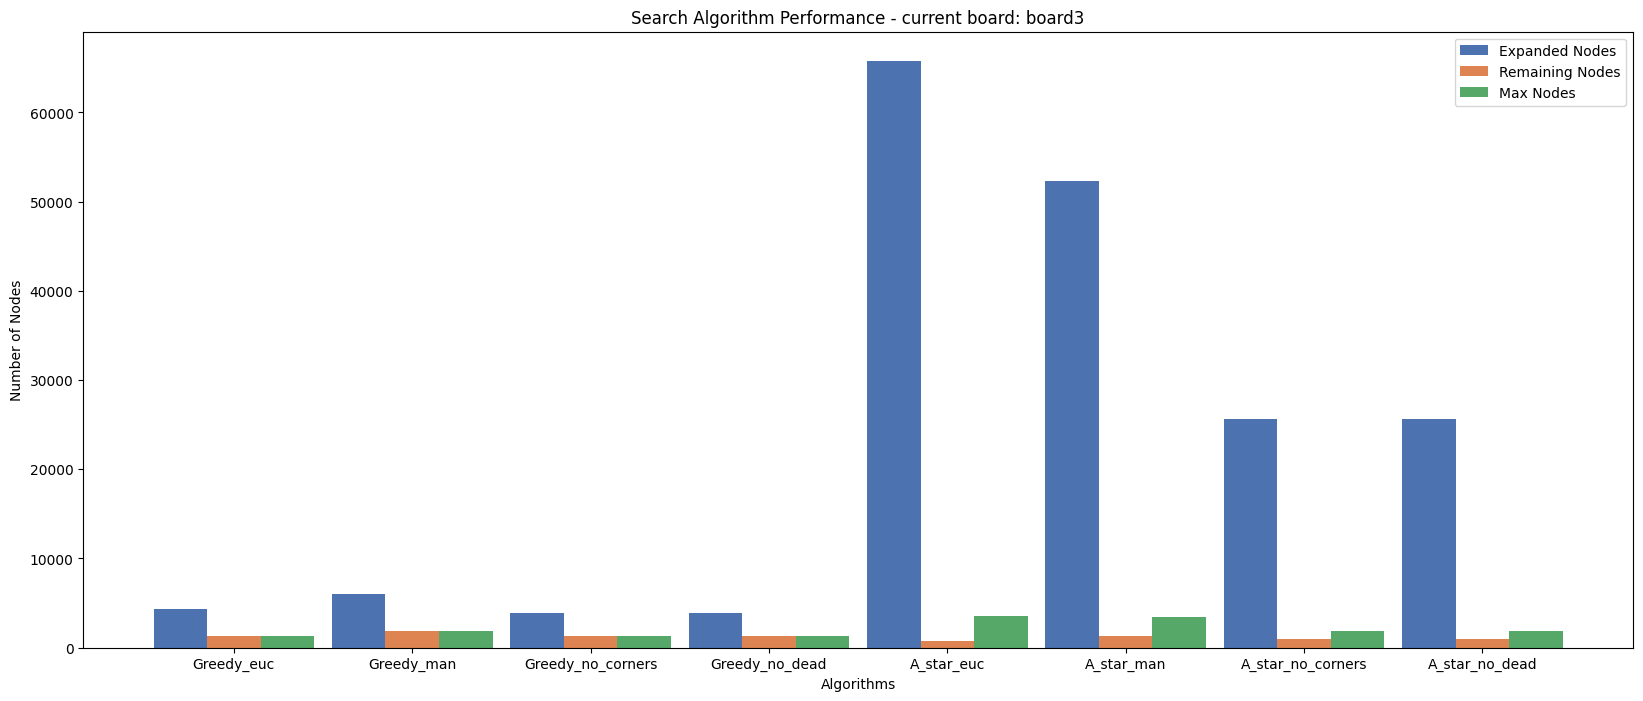

Current board:
# # # # # # # # # # # # # # # # # # #
# # # # # # # # # # g _ _ # # # # # #
# # # # # # # _ o _ # _ _ _ # # # # #
# # # # # # _ _ b _ # _ _ _ _ # # # #
# # # # # _ _ _ _ # # # _ _ _ _ # # #
# # # # _ _ _ _ # # # # # _ _ _ _ # #
# # # _ _ _ _ # # # # # # # _ _ _ _ #
# # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# # # # # # # # # # # # # # _ _ # # #
# # # # # # # # # # # # # # # # # # #



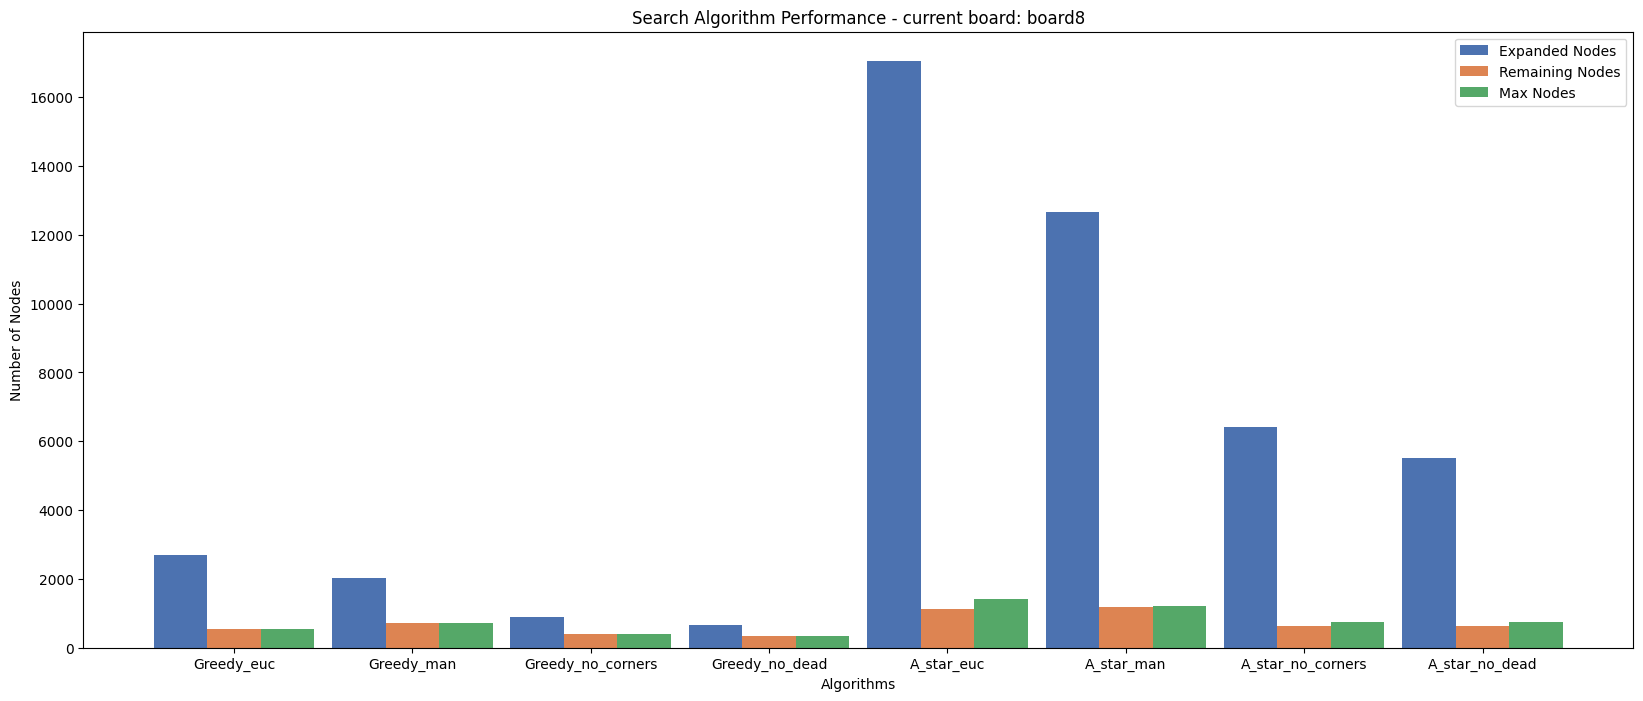

In [18]:
plot_search_statistics(boards, board_names, algos)

In [19]:
board_names = ['board9']
boards = []
for bn in board_names:
    boards.append(open_board(f'boards/{bn}.txt'))

In [20]:
algos = [algo for algo in algorithms.keys() if algo != 'bfs' and algo != 'dfs']
execution_times_per_board = exec_times_per_algorithm_and_board(algos, boards, iters=3)

Current board:
# # # # # # # # # # # # # # # # # # # # # # # # # #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ g #
# _ _ # # # # # # # # # # # # # # # # # # # # # # #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# # # # # # # # # # # # # # # # # # # # # # # _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ # # # # # # # # # # # # # # # # # # # # # # #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# # # # # # # # # # # # # # # # # # # # # # # _ _ #
# o _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# _ _ _ b _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

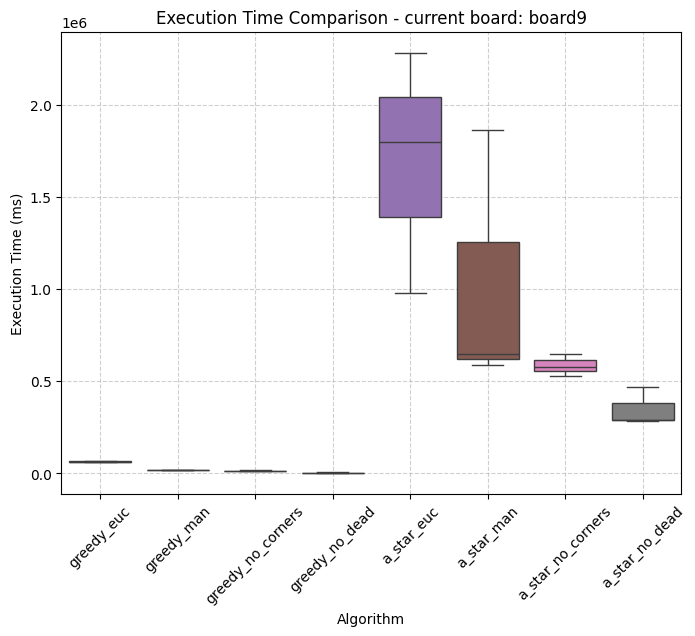

In [21]:
plot_exec_times(boards, board_names, execution_times_per_board)

Current board:
# # # # # # # # # # # # # # # # # # # # # # # # # #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ g #
# _ _ # # # # # # # # # # # # # # # # # # # # # # #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# # # # # # # # # # # # # # # # # # # # # # # _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ # # # # # # # # # # # # # # # # # # # # # # #
# _ _ # _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #
# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# # # # # # # # # # # # # # # # # # # # # # # _ _ #
# o _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # _ _ #
# _ _ _ b _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

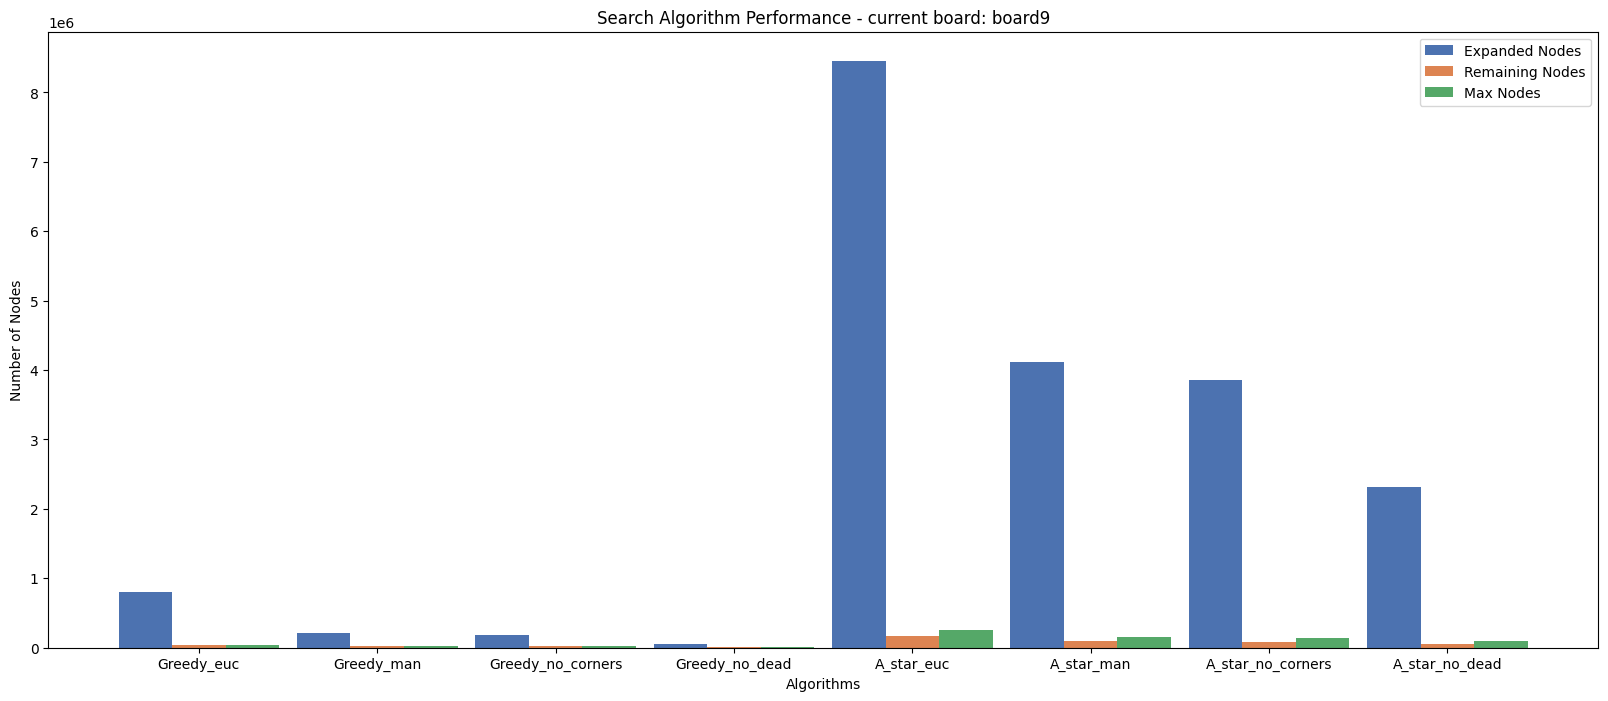

In [22]:
plot_search_statistics(boards, board_names, algos)